In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import gmplot

In [3]:
df = pd.read_csv('event.csv', names=['Month', 'Date', 'Year', 'Offence', 'Offence_Desc', 'Borough', 'Lat', 'Long', 'Count'])

In [4]:
dec25 = df.loc[(df['Month']==12) & (df['Date']==25)]

In [5]:
yearwise = dec25[['Year', 'Borough', 'Count']].groupby(['Year', 'Borough'])['Count'].sum()
yearwise

Year  Borough      
2006  BRONX             62
      BROOKLYN          92
      MANHATTAN         39
      QUEENS            85
      STATEN ISLAND     32
2007  BRONX             63
      BROOKLYN          80
      MANHATTAN         41
      QUEENS           100
      STATEN ISLAND     17
2008  BRONX             52
      BROOKLYN          79
      MANHATTAN         46
      QUEENS            64
      STATEN ISLAND     19
2009  BRONX             69
      BROOKLYN          92
      MANHATTAN         41
      QUEENS            75
      STATEN ISLAND     20
2010  BRONX             57
      BROOKLYN          99
      MANHATTAN         46
      QUEENS            53
      STATEN ISLAND      9
2011  BRONX             72
      BROOKLYN         100
      MANHATTAN         40
      QUEENS            76
      STATEN ISLAND     14
2012  BRONX             66
      BROOKLYN          85
      MANHATTAN         41
      QUEENS            74
      STATEN ISLAND     16
2013  BRONX             63
      BR

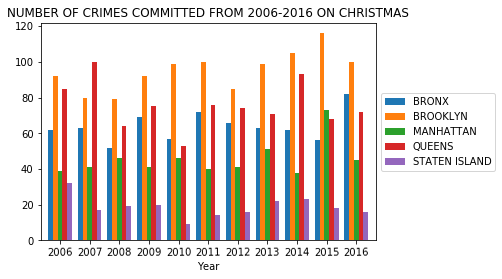

In [6]:
fig=plt.figure(figsize=(10, 10), dpi= 150, facecolor='w', edgecolor='k')
legends = ['2006','2007','2008','2009', '2010', '2011','2012','2013','2014','2015', '2016']
a = yearwise.unstack().plot(kind='bar', rot=1, title="NUMBER OF CRIMES COMMITTED FROM 2006-2016 ON CHRISTMAS", legend=legends, label=legends, width=0.8)
a.legend(loc='center left',bbox_to_anchor = (1,0.5))

In [9]:
specific_crimes = dec25[['Year', 'Offence', 'Count']].groupby(['Year', 'Offence'])['Count'].count().nlargest(50)
specific_crimes

Year  Offence                       
2016  ASSAULT 3 & RELATED OFFENSES      107
2014  ASSAULT 3 & RELATED OFFENSES      103
2015  ASSAULT 3 & RELATED OFFENSES       95
      PETIT LARCENY                      93
2013  ASSAULT 3 & RELATED OFFENSES       87
2011  ASSAULT 3 & RELATED OFFENSES       86
2007  ASSAULT 3 & RELATED OFFENSES       82
2009  ASSAULT 3 & RELATED OFFENSES       81
2007  CRIMINAL MISCHIEF & RELATED OF     79
2013  PETIT LARCENY                      78
2006  ASSAULT 3 & RELATED OFFENSES       77
2012  ASSAULT 3 & RELATED OFFENSES       77
2006  CRIMINAL MISCHIEF & RELATED OF     75
2016  PETIT LARCENY                      73
2008  PETIT LARCENY                      72
2006  PETIT LARCENY                      70
2010  CRIMINAL MISCHIEF & RELATED OF     70
2012  PETIT LARCENY                      69
2014  PETIT LARCENY                      69
2007  PETIT LARCENY                      67
2009  PETIT LARCENY                      67
2010  ASSAULT 3 & RELATED OFFENSES     

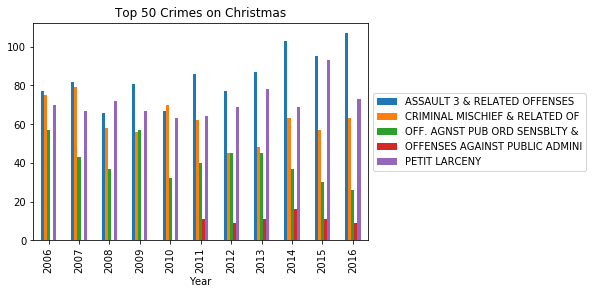

In [11]:
p = specific_crimes.unstack().plot(kind='bar', title="Top 50 Crimes on Christmas")
p.legend(loc='center left',bbox_to_anchor = (1,0.5))

In [12]:
total_crimes = dec25[['Offence', 'Count']].groupby(['Offence'])['Count'].count().nlargest(30)
total_crimes

Offence
ASSAULT 3 & RELATED OFFENSES            928
PETIT LARCENY                           785
CRIMINAL MISCHIEF & RELATED OF          676
OFF. AGNST PUB ORD SENSBLTY &           449
OFFENSES AGAINST PUBLIC ADMINI           92
SEX CRIMES                               38
DANGEROUS DRUGS                          33
CRIMINAL TRESPASS                        30
INTOXICATED & IMPAIRED DRIVING           20
OFFENSES AGAINST THE PERSON              17
UNAUTHORIZED USE OF A VEHICLE            16
DANGEROUS WEAPONS                        16
FRAUDS                                   14
ADMINISTRATIVE CODE                      11
VEHICLE AND TRAFFIC LAWS                  9
OTHER OFFENSES RELATED TO THEF            7
POSSESSION OF STOLEN PROPERTY             7
FRAUDULENT ACCOSTING                      2
OFFENSES INVOLVING FRAUD                  1
AGRICULTURE & MRKTS LAW-UNCLASSIFIED      1
BURGLARS TOOLS                            1
Name: Count, dtype: int64

In [13]:
holiday_crimes = dec25.loc[(dec25['Offence']=="OFF. AGNST PUB ORD SENSBLTY &") | (dec25['Offence']=="OFFENSES AGAINST PUBLIC ADMINI") | (dec25['Offence']=="INTOXICATED & IMPAIRED DRIVING") | (dec25['Offence']=="DANGEROUS WEAPONS") ]          

In [14]:
gmap = gmplot.GoogleMapPlotter(holiday_crimes.iloc[1,6], holiday_crimes.iloc[1,7], 10)

gmap.scatter(holiday_crimes.iloc[:, 6], holiday_crimes.iloc[:, 7], '#FF6666', edge_width=5, marker=False)
gmap.draw('christmas.html')

C:\Users\ss104\Anaconda3\lib\site-packages\gmplot\gmplot.py:255: RuntimeWarning: invalid value encountered in double_scalars
  x = ((lng1 - dlng + math.pi) % (2.0 * math.pi)) - math.pi


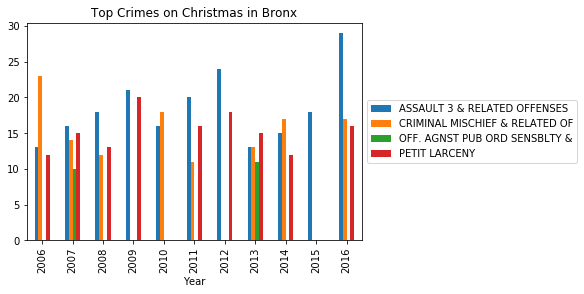

In [51]:
# bronx
bronx = dec25.loc[df['Borough']=='BRONX']
bronx_crimes = bronx.groupby(['Year', 'Offence'])['Count'].count().nlargest(30)
bronx_crimes
p = bronx_crimes.unstack().plot.bar(title="Top Crimes on Christmas in Bronx")
p.legend(loc='center left',bbox_to_anchor = (1,0.5))

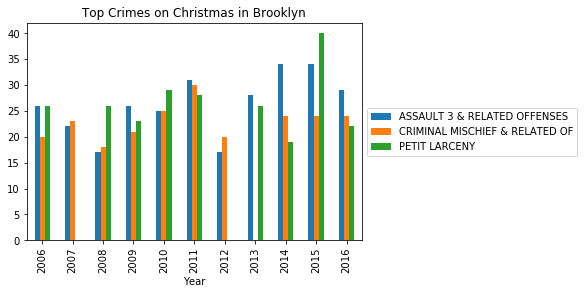

In [42]:
# brooklyn
brooklyn = dec25.loc[df['Borough']=='BROOKLYN']
brooklyn_crimes = brooklyn[['Year', 'Offence', 'Count']].groupby(['Year', 'Offence'])['Count'].count().nlargest(30)
brooklyn_crimes
p=brooklyn_crimes.unstack().plot.bar(title="Top Crimes on Christmas in Brooklyn")
p.legend(loc='center left',bbox_to_anchor = (1,0.5))

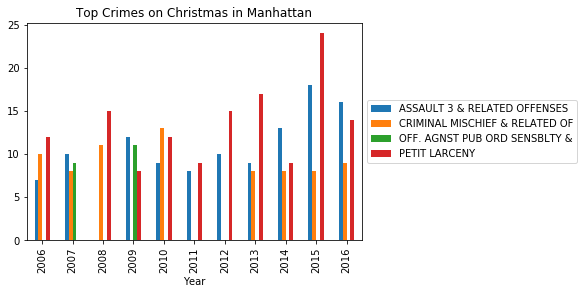

In [45]:
# manhattan
manhattan = dec25.loc[df['Borough']=='MANHATTAN']
manhattan_crimes = manhattan[['Year', 'Offence', 'Count']].groupby(['Year', 'Offence'])['Count'].count().nlargest(30)
manhattan_crimes
p=manhattan_crimes.unstack().plot.bar(title="Top Crimes on Christmas in Manhattan")
p.legend(loc='center left',bbox_to_anchor = (1,0.5))

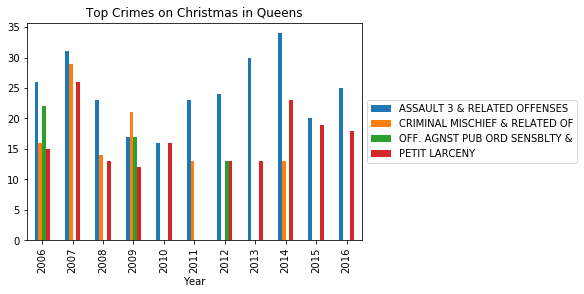

In [46]:
# queens
queens = dec25.loc[df['Borough']=='QUEENS']
queens_crimes = queens[['Year', 'Offence', 'Count']].groupby(['Year', 'Offence'])['Count'].count().nlargest(30)
queens_crimes
p=queens_crimes.unstack().plot.bar(title="Top Crimes on Christmas in Queens")
p.legend(loc='center left',bbox_to_anchor = (1,0.5))

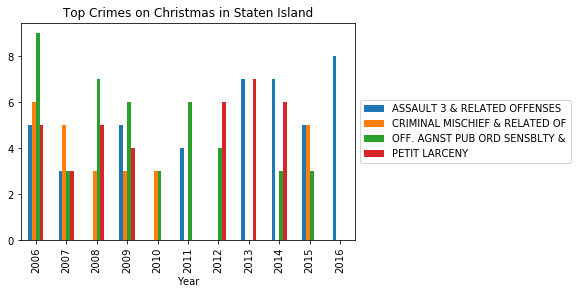

In [47]:
# staten
staten = dec25.loc[df['Borough']=='STATEN ISLAND']
staten_crimes = staten[['Year', 'Offence', 'Count']].groupby(['Year', 'Offence'])['Count'].count().nlargest(30)
staten_crimes
p=staten_crimes.unstack().plot.bar(title="Top Crimes on Christmas in Staten Island")
p.legend(loc='center left',bbox_to_anchor = (1,0.5))